# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt
import skimage.io


---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

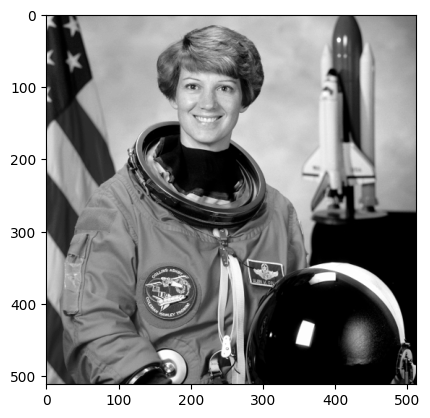

In [2]:
img = skimage.io.imread("data/astronaut.png").astype(float) / 255.0

plt.imshow(img, "gray")

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [3]:
def prewitt_h(img_in):
    result = numpy.zeros(img_in.shape)
    for row in range(1, img_in.shape[0] - 1):
        for col in range (1, img_in.shape[1] - 1):
            val = (img_in[row-1, col-1] * -1 + img_in[row, col-1] * -1 + img_in[row+1, col-1] * -1) + \
                  (img_in[row-1, col+1] * 1 + img_in[row, col+1] * 1 + img_in[row+1, col+1] * 1)
            result[row, col] = val / 6
    return result

def prewitt_v(img_in):
    result = numpy.zeros(img_in.shape)
    for row in range(1, img_in.shape[0] - 1):
        for col in range (1, img_in.shape[1] - 1):
            val = (img_in[row-1, col-1] * -1 + img_in[row-1, col] * -1 + img_in[row-1, col+1] * -1) + \
                  (img_in[row+1, col-1] * 1 + img_in[row+1, col] * 1 + img_in[row+1, col+1] * 1)
            result[row, col] = val / 6
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

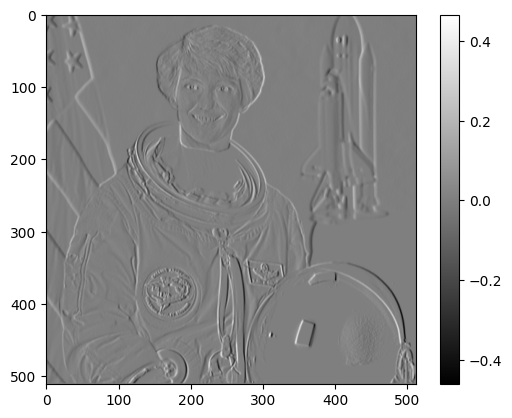

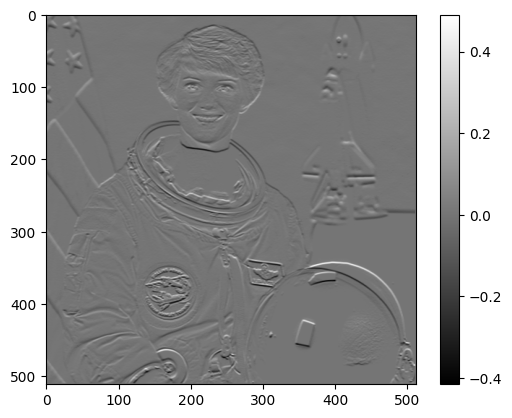

In [4]:
gx = prewitt_h(img)
gy = prewitt_v(img)

plt.figure()
plt.imshow(gx, cmap="gray")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(gy, cmap="gray")
plt.colorbar()
plt.show()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

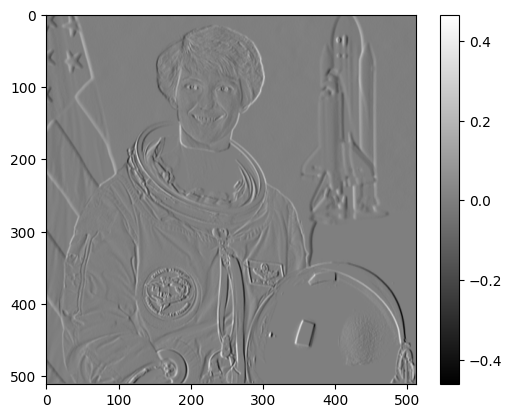

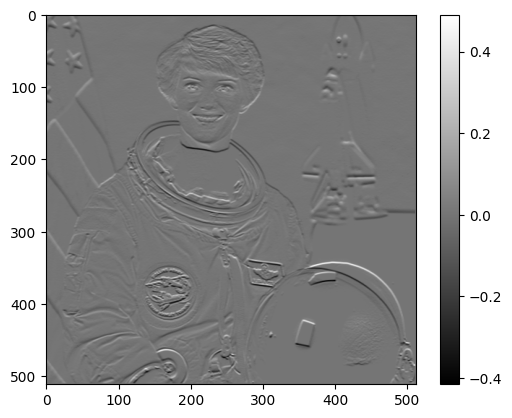

In [5]:

gxcorr = skimage.io.imread("data/astronaut_prewitt_h.tiff")
gycorr = skimage.io.imread("data/astronaut_prewitt_v.tiff")

plt.figure()
plt.imshow(gxcorr, cmap="gray")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(gycorr, cmap="gray")
plt.colorbar()
plt.show()

In [6]:
print(gx.shape)
print(gxcorr.shape)
print(gy.shape)
print(gycorr.shape)

(512, 512)
(512, 512)
(512, 512)
(512, 512)


In [7]:
assert numpy.allclose(gy, gycorr, atol=1/255)
assert numpy.allclose(gx, gxcorr, atol=1/255)


---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

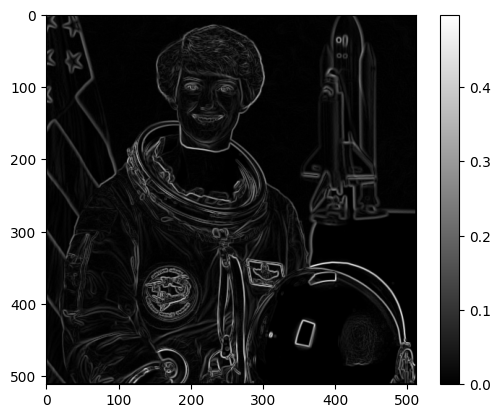

In [8]:
gradmag = numpy.sqrt(gx**2 + gy**2)

plt.figure()
plt.imshow(gradmag, "gray")
plt.colorbar()
plt.show()

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

In [9]:
gradmagcorr = skimage.io.imread("data/astronaut_prewitt_gradmag.tiff")

assert numpy.allclose(gradmag, gradmagcorr, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

In [10]:
def sobel_h(img_in):
    result = numpy.zeros(img_in.shape)
    for row in range(1, img_in.shape[0] - 1):
        for col in range (1, img_in.shape[1] - 1):
            val = (img_in[row-1, col-1] * -1 + img_in[row, col-1] * -2 + img_in[row+1, col-1] * -1) + \
                  (img_in[row-1, col+1] * 1 + img_in[row, col+1] * 2 + img_in[row+1, col+1] * 1)
            result[row, col] = val / 8
    return result

def sobel_v(img_in):
    result = numpy.zeros(img_in.shape)
    for row in range(1, img_in.shape[0] - 1):
        for col in range (1, img_in.shape[1] - 1):
            val = (img_in[row-1, col-1] * -1 + img_in[row-1, col] * -2 + img_in[row-1, col+1] * -1) + \
                  (img_in[row+1, col-1] * 1 + img_in[row+1, col] * 2 + img_in[row+1, col+1] * 1)
            result[row, col] = val / 8
    return result

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

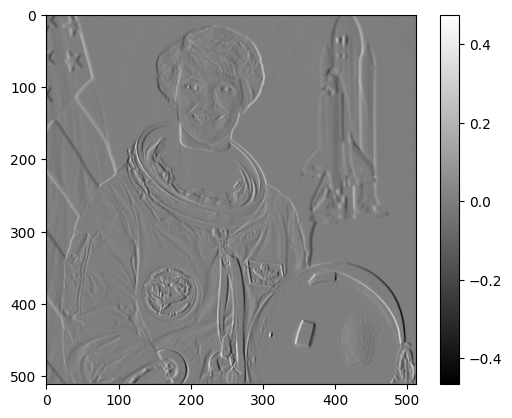

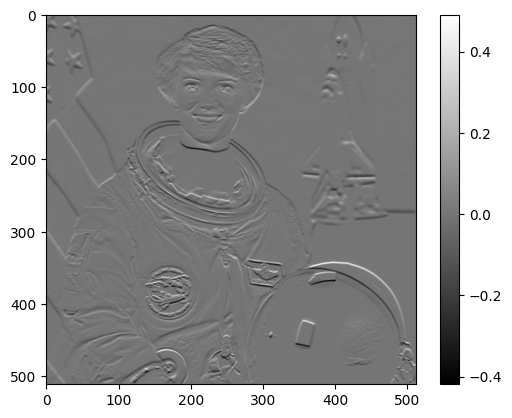

In [13]:
gxsobel = sobel_h(img)
gysobel = sobel_v(img)

plt.imshow(gxsobel, "gray")
plt.colorbar()
plt.show()

plt.imshow(gysobel, "gray")
plt.colorbar()
plt.show()

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`:

In [14]:
gxsobelcorr = skimage.io.imread("data/astronaut_sobel_h.tiff")
gysobelcorr = skimage.io.imread("data/astronaut_sobel_v.tiff")

assert numpy.allclose(gxsobel, gxsobelcorr, atol=1/255)
assert numpy.allclose(gysobel, gysobelcorr, atol=1/255)